# Weighted ECM clustering
## Toys dataset - 2 clusters, 2 dimensions


In [45]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
from evclust.ecm import ecm
from evclust.wecm_new import wecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot, calculate_non_specificity, ev_plot_2D
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import adjusted_rand_score, silhouette_score
import seaborn as sns


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


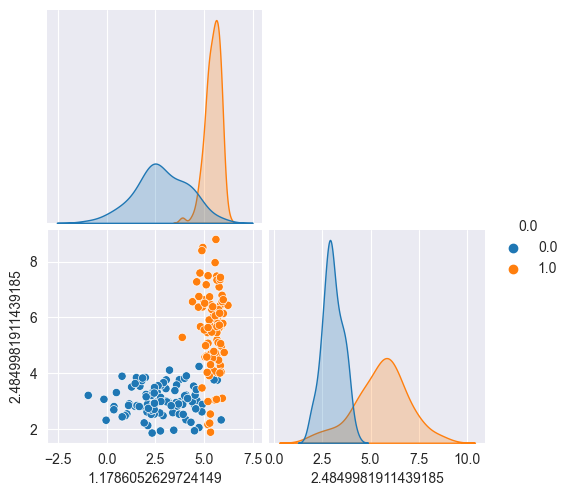

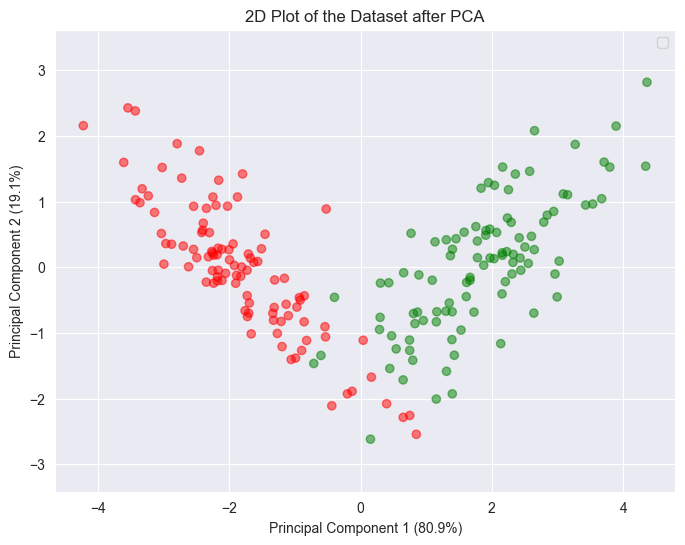

In [51]:
## Generating data set
df_wt_label = pd.read_csv('../../src/evclust/datasets/2c2dDataset.csv')
dataset = df_wt_label.values
df = pd.DataFrame(dataset[:, :-1])

# Scatter matrix plot
sns.pairplot(df_wt_label, corner=True, hue=df_wt_label.columns[-1])

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
data_reduced = pca.fit_transform(dataset[:, :-1])
variance_percent = np.round(pca.explained_variance_ratio_ * 100, 1)

# Plot the reduced dataset with different colors for each cluster
tmp = np.array(dataset[:, -1])
colors = np.where(tmp == 0.0, 'green', 'red')

plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.5, c=colors)
plt.title('2D Plot of the Dataset after PCA')
plt.xlabel(f"Principal Component 1 ({variance_percent[0]}%)")
plt.ylabel(f"Principal Component 2 ({variance_percent[1]}%)")
plt.legend()
plt.grid(True)
plt.axis('equal')
# plt.gca().set_aspect('equal', adjustable='box')
plt.show()


## Traditional ECM

[1, 235.55717142954683]
[2, 230.3395988222439]
[3, 229.68099904960638]
[4, 229.53782475230392]
[5, 229.49065637501926]
[6, 229.47311972417558]
[7, 229.46644644813415]
[8, 229.46389821599595]
[9, 229.462925399877]
[  0.        229.4629254 229.4629254]
[1, 235.55717142954686]
[2, 230.33959882224386]
[3, 229.6809990496064]
[4, 229.53782475230386]
[5, 229.4906563750193]
[6, 229.47311972417555]
[7, 229.46644644813415]
[8, 229.463898215996]
[9, 229.462925399877]
[  1.        229.4629254 229.4629254]
[1, 235.55717142954686]
[2, 230.33959882224386]
[3, 229.6809990496064]
[4, 229.53782475230386]
[5, 229.4906563750193]
[6, 229.47311972417555]
[7, 229.46644644813415]
[8, 229.463898215996]
[9, 229.462925399877]
[  2.        229.4629254 229.4629254]
[1, 235.55717142954686]
[2, 230.33959882224386]
[3, 229.6809990496064]
[4, 229.53782475230386]
[5, 229.4906563750193]
[6, 229.47311972417555]
[7, 229.46644644813415]
[8, 229.463898215996]
[9, 229.462925399877]
[  3.        229.4629254 229.4629254]
[1, 2

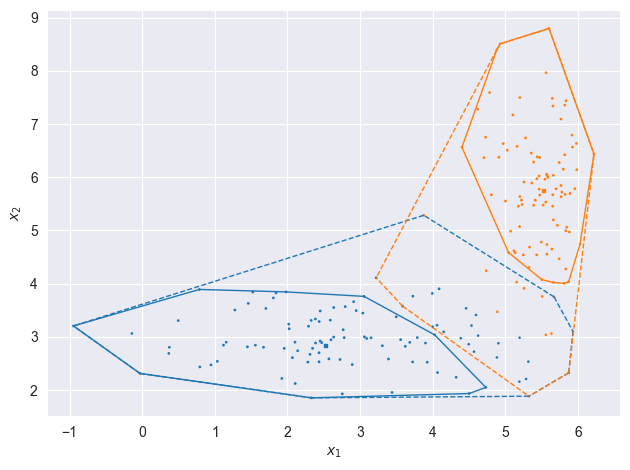

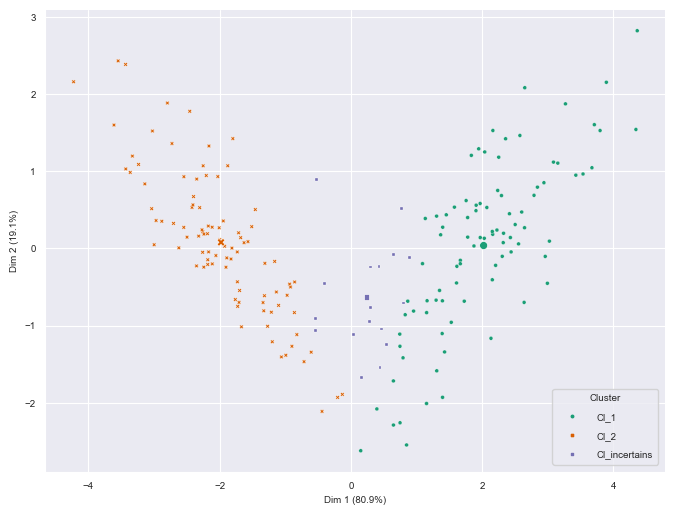

In [47]:
# Traditional ECM clustering
model = ecm(x=df, c=2, beta=2, alpha=1, delta=100, ntrials=10)

# Compute the Adjusted Rand Index (ARI)
true_labels = dataset[:, -1].astype(int)
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Traditional ECM----------")
print(f"Jbest: {model['crit']}")
print(f"Centers: \n {model['g']}")

print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity
calculate_non_specificity(model)

# Plots
ev_plot(model, X=df)
ev_pcaplot(data=df, x=model, normalize=False)

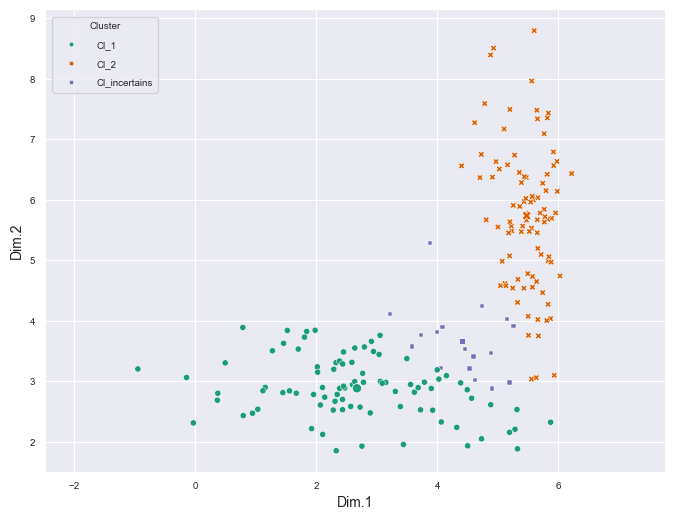

In [48]:
ev_plot_2D(data=dataset[:, :-1], x=model, normalize=False, cex=20)

## Feature weighted ECM (FW-ECM)

Initial weights: 
 [[0.25700229 0.74299771]
 [0.79224938 0.20775062]]
---------Iteration #1---------
Initial prototypes: 
 [[5.44921707 5.68144983]
 [2.88033069 2.95820469]]
[1, 90.57849459789269]
[2, 62.173182035909456]
[3, 57.57686490820636]
[4, 57.39653674250554]
[5, 57.388551982033334]
[6, 57.387940949115006]
[ 0.         57.38794095 57.38794095]
---------End Iteration #1---------
---------Iteration #2---------
Initial prototypes: 
 [[2.88033069 2.95820469]
 [5.44921707 5.68144983]]
[1, 31.066080548415652]
[2, 30.287210324604676]
[3, 30.189475959307174]
[4, 30.168688712978646]
[5, 30.163970978830193]
[6, 30.162886158333308]
[7, 30.162635455201094]
[ 1.         30.16263546 30.16263546]
---------End Iteration #2---------
---------Iteration #3---------
Initial prototypes: 
 [[2.88033069 2.95820469]
 [5.44921707 5.68144983]]
[1, 31.066080548415652]
[2, 30.287210324604676]
[3, 30.189475959307174]
[4, 30.168688712978646]
[5, 30.163970978830193]
[6, 30.162886158333308]
[7, 30.162635455201

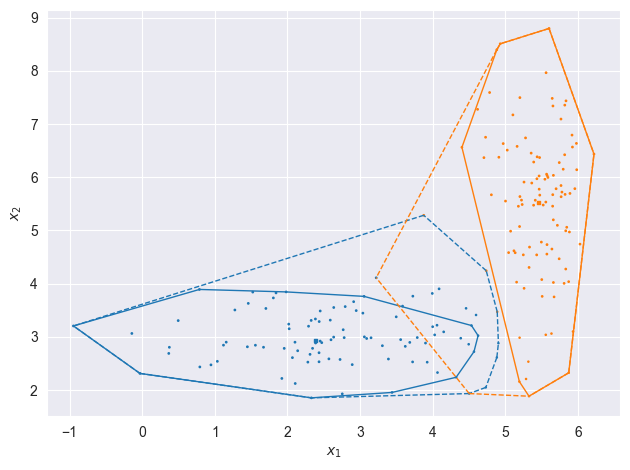

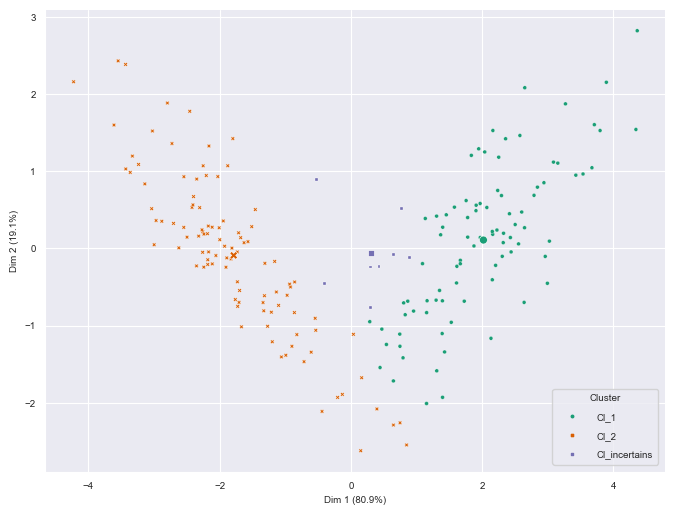

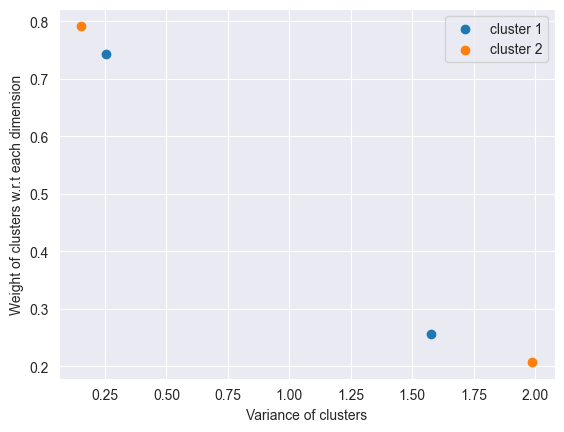

In [49]:
# Feature weighted ECM clustering
W = np.array([
    [0.25700229, 0.74299771],
    [0.79224938, 0.20775062]
])
c = 2
model = wecm(x=df, c=c, W=W, beta=2, alpha=1, delta=100, ntrials=10)

# Compute the Adjusted Rand Index (ARI)
true_labels = dataset[:, -1].astype(int)
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Weighted ECM----------")
print(f"Jbest: {model['crit']}")
print(f"Centers: \n {model['g']}")
print(f"Final weights: \n {model['W']}")

print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity
calculate_non_specificity(model)

# Plotting
ev_plot(model, X=df)
ev_pcaplot(data=df, x=model, normalize=False)

W = model['W']
cov_mat1 = np.cov(df[predicted_labels == 0].transpose())
cov_mat2 = np.cov(df[predicted_labels == 1].transpose())

W_COV_1 = pd.DataFrame({'y': W[0, :], 'x': np.diag(cov_mat1)})
W_COV_1.sort_values('x', inplace=True)
W_COV_2 = pd.DataFrame({'y': W[1, :], 'x': np.diag(cov_mat2)})
W_COV_2.sort_values('x', inplace=True)

plt.clf()
plt.scatter(W_COV_1['x'], W_COV_1['y'], label="cluster 1", marker='o')
plt.scatter(W_COV_2['x'], W_COV_2['y'], label="cluster 2", marker='o')
plt.xlabel("Variance of clusters")
plt.ylabel("Weight of clusters w.r.t each dimension")
plt.legend()
plt.show()

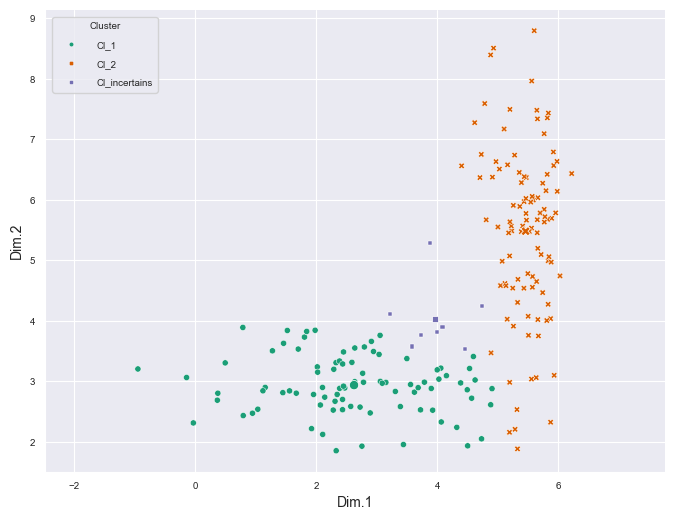

In [50]:
ev_plot_2D(data=dataset[:, :-1], x=model, normalize=False, cex=20)

## Non-specificity equation
![test.png](../assets/normlaized-non-specificity.png)